<a href="https://colab.research.google.com/github/Pushkar1-GitHub/AI-in-Biology/blob/main/Copy_of_SVR_RBF_Kernel_Trick_gamma_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

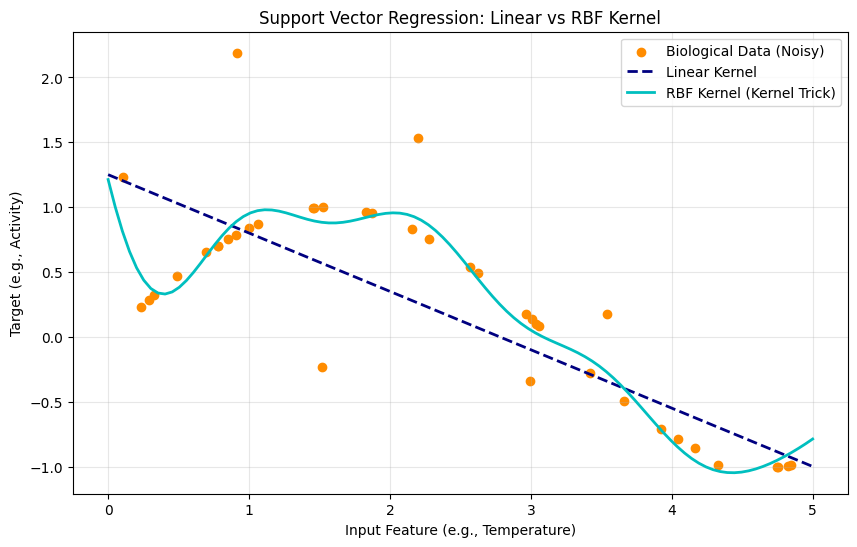

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# 1. Generate Synthetic Data (Non-linear)
# Imagine X is 'Temperature' and y is 'Enzyme Activity'
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add some noise to simulate real-world biological data
y[::5] += 3 * (0.5 - np.random.rand(8))

# 2. Fit Regression Models
# Model A: Linear Kernel (The "Straight Line" approach)
svr_lin = SVR(kernel='linear', C=100)

# Model B: RBF Kernel (The "Kernel Trick" approach)
# gamma=0.1 controls the 'width' of the kernel
# C=100 controls the penalty for error
svr_rbf = SVR(kernel='rbf', C=100, gamma=1.0, epsilon=.1)

# Train the models
svr_lin.fit(X, y)
svr_rbf.fit(X, y)

# 3. Predict results for plotting
prediction_line = np.linspace(0, 5, 100)[:, None] # Smooth line for plotting
y_lin = svr_lin.predict(prediction_line)
y_rbf = svr_rbf.predict(prediction_line)

# 4. Visualization
plt.figure(figsize=(10, 6))

# Plot the raw data
plt.scatter(X, y, color='darkorange', label='Biological Data (Noisy)')

# Plot Linear SVR
plt.plot(prediction_line, y_lin, color='navy', lw=2, linestyle='--', label='Linear Kernel')

# Plot RBF SVR
plt.plot(prediction_line, y_rbf, color='c', lw=2, label='RBF Kernel (Kernel Trick)')

plt.xlabel('Input Feature (e.g., Temperature)')
plt.ylabel('Target (e.g., Activity)')
plt.title('Support Vector Regression: Linear vs RBF Kernel')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()